In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
# separating the dataset

X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# splitting the data
from sklearn.model_selection import train_test_split

# doing a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [6]:
# fitting logistic regression to predict fraudulent transactions
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(random_state=1, max_iter=1000)

# fitting the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# scoring the model

print(f'Training data model score: {logreg.score(X_train, y_train)}')
print()
print(f'Test data model score: {logreg.score(X_test, y_test)}')

Training data model score: 0.9991773840813788

Test data model score: 0.9991222218320986


##### We got terrific accuracy on the dataset. Let's examine the target class frequency

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


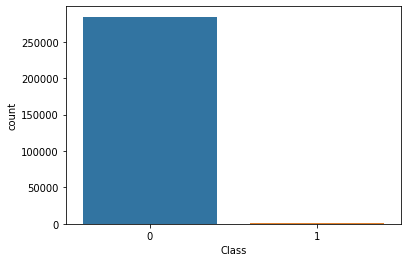

In [8]:
import seaborn as sns

plt.figure()
sns.countplot(y)
plt.show()

In [9]:
print(y_test.value_counts())

print(y_train.value_counts())

0    85308
1      135
Name: Class, dtype: int64
0    199007
1       357
Name: Class, dtype: int64


#### There is clearly a class imbalance here with very few number of fraudulent transactions happening (class =1)

#### Thus, we cannot rely solely on the model accuracy as the evaluation metric.

- According to this model, with target class imbalance, if this predicts a particular transaction to be non-fraudulent, it will be accurate 99.9177% of the times!

Let's dive deeper into our results. In binary classification, there are four possible outcomes:

1. **True Positive (TP)**: Model predicts that $x$ belongs to the positive class (1) and it is actually positive (1)

2. **False Positive (FP)**: Model predicts that $x$  belongs to the positive class (1) but it is acually negative (0)

3. **True Negative (TN)**: Model predicts that $x$ belongs to the negative class (0) and it is actually negative (0)

4. **False Negative (FN)**: Model predicts that $x$ belongs to the negative class (0) but it is acually positive (1)

If we put these outcomes in a matrix, we arrive at what is known as a confusion matrix:

|   .  |  Predicted Class 0/-  |   Predicted Class 1/+  | 
| --------- |:---:|:---:|
|Actual Class 0/-|**TN** | **FP** | 
|Actual Class 1/+|**FN** |**TP** | 


- The goal of a classification model is to ultimately minimize misclassification i.e minimize FP and FN

Using these definitions, accuracy can be written as:

$$Accuracy = \frac{TN+TP}{TN+FP+FN+TP}$$

Lets get the confusion matrix for our data:

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_predicted = logreg.predict(X_test)

matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[85292,    16],
       [   59,    76]])

In [12]:
# visualizing confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

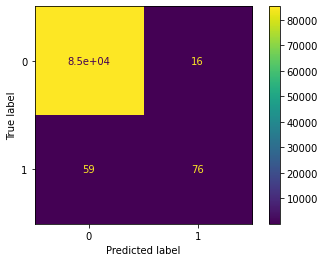

In [13]:
matrix_display = ConfusionMatrixDisplay(matrix, display_labels=['0', '1'])
matrix_display.plot()


##### Lets interpret this confusion matrix


|   .  |  Predicted Non-fraudulent (0/-)  |   Predicted Fraudulent (1/+)  | 
| --------- |:---:|:---:|
|True Non-fraudulent (0/-) |85292 | 16 | 
|True Fraudulent (1/+) |59 |76 | 


* **TN**: Model classified 85,292 legitimate(non-fraudulent) transactions that were indeed non-fraudulent
* **FP**: Model classified 16 transactions as fraudulent that were actually non-fraudulent
* **FN**: Model classified 59 transactions as non-fraudulent that were actually fraudulent
* **TP**: Model classified 76 fraudulent transactions that were indeed fraud


The goal is to identify the frauds (class 1). Out of 135 (76+59) total fraudulent transactions in the test data, the model correctly identified only 76 or 56% of such transactions.

Moreover 16 transactions were misclassified as fraud. 

These are serious oversights in this model, with only 56% of the frauds being correctly identified by it.

### Precision and Recall

Because of the fact that accuracy alone can be misleading depending on the class balance of the data, alternative metrics which consider the relative proportions of correct and incorrect classifications in both the positive and negative classes. Two of the most common are *precision* and *recall*. 


**Precision**: whenever you are concerned about the impact of *False Positives*, precision metric should be evaluated.


$$Precision = \frac{TP}{TP+FP}$$

TP+FP: total number of positive classifications **done by the model**

Precision measures that out of all **positive predictions** by the model, how many datapoints are truly positive. 

For Precision, think about **prediction** as the basis of evaluation.

- Higher # of FP -> Lower Precision

- Lower # of FP -> Higher Precision








**Recall**: whenever you are concerned about the impact of *False Negatives*, recall metric should be evaluated.


$$Recall = \frac{TP}{TP+FN}$$

TP+FN: total number of classification belonging to **actual/true positive class**

Recall measures that out of all the datapoints belonging to acual positive class, **how many points were correctly identified by the model as positives**

For recall, think about **actual/true data** as the basis of evaluation.

- Higher # of FN -> Lower Recall

- Lower # of FN -> Higher Recall

##### Back to our model

|   .  |  Predicted Non-fraudulent (0/-)  |   Predicted Fraudulent (1/+)  | 
| --------- |:---:|:---:|
|True Non-fraudulent (0/-) |85292 | 16 | 
|True Fraudulent (1/+) |59 |76 | 



**Precision**: Out of 92 transactions predicted by the model as fraudulent/+, 76 were indeed truly fraudulent/+.
$$Precision = \frac{76}{76+16} = \frac{76}{92}= 82.60\%$$

**Recall**: Out of 135 transactions belonging to fradulent/+ class, 76 were correctly identified by the model as fraudulent/+
$$Recall =\frac{76}{76+59} = \frac{76}{135} = 59.29\%$$



In [14]:
# obtaining Precision score

from sklearn.metrics import precision_score

print(f"Model's Precision: {precision_score(y_test, y_predicted)}")

Model's Precision: 0.8260869565217391


In [15]:
# obtaining Recall score

from sklearn.metrics import recall_score

print(f"Model's Recall: {recall_score(y_test, y_predicted)}")

Model's Recall: 0.562962962962963


**100% Precision**: means that all of the transactions classified by the model as fraudulent/+ are indeed fraudulent. The model is very precise in predicting fraud.

**0% Precision**: means that of all the transactions classified by the model as fradululent/+, none of the transactions are actually fraudulent. 

**100% Recall**: means that off all the true fraudulent/+ transactions, the model is able to correctly classify all of the transactions as fraudulent.

**0% Recall**: means that off all the true fraudulent/+ transactions, the mode is unable to classifiy any transaction as fraudulent.

If I am able to recall every fraud, I could be also calling a lot of non-fraudulent transactions fraud. This means that my precision would be lower. We have an imprecise model (_i.e._ there are more false positives) but one that is very likely to predict all instances of fraud which did occur, at the expense of incorrectly labeling some legitimate transactions fraudulent.

If everything I predict to be a fraud is fraud, it doesn't necessarily mean that I am capturing all of the fraudulent transactions, only that I am very confident in my predictions of which transactions are fraudulent. This means that my recall would be lower. I have a highly precise model, but at the expense of missing many of the fraudulent transactions which may have occurred (_i.e._ there are more false negatives).

So, we can improve either at the expense of the other. There is always a trade-off between precision and recall, between correctly predicting the positive and negative classes.

Another common metric that combines the two measures is the $F_1$ score:

$$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$


The F1 score is the harmonic average of the precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

There is no intuitive explanation of the F1 score. We use the F1 score in order to try and maximize the precision and recall scores. Models with a higher F1 score are usually better at predicting the positive class. 

In [16]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predicted)

0.669603524229075

Finally, the very handy `classification_report` function in `sklearn.metrics` will compute precision, recall, and $F_1$ score for both the positive and negative classes in a nicely formatted output:

In [17]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.56      0.67       135

    accuracy                           1.00     85443
   macro avg       0.91      0.78      0.83     85443
weighted avg       1.00      1.00      1.00     85443



### True Positive Rate, False Positive Rate

For classifiers such as Logistic Regression, by varying the threshold at which we consider a point to be classified into the positive class, we can tailor the model to have higher precision or recall depending upon the nature of the problem or domain knowledge. 

For example, if the threshold is set at 0.5, it means the model classifies a datapoint to class 1 if the predicted probability is higher that 0.5.

If the threshold is lowered to say 0.4, the more datapoint are likely to be classified by the model into the positive class. This would also mean that some of the negative class points could also be incorrectly classified to positive class. Lowering the threshold typically **increases both true positives and false positives**.

If the threshold is increased to say 0.7, the more datapoints are likely to be classified into the negative class, leading to some positive points incorrectly classified to negative. Increasing the threshold typically **increases both true negatives and false negatives**.

Lets see how varying the threshold affects the precision and recall of this model. I have used 'predict_proba' method of logistic regression model to get the probability scores and then manually assigned the probabilites to respective classes based on chosed threshold cutoff.

In [22]:
logreg.predict_proba(X_test)
# the first value is the prob. of datapoint belonging to 0
# second values is the prob. of datapoint belonging to 1

array([[9.99001890e-01, 9.98109725e-04],
       [9.99984501e-01, 1.54987533e-05],
       [9.99938414e-01, 6.15855879e-05],
       ...,
       [9.98744727e-01, 1.25527347e-03],
       [9.99915140e-01, 8.48600248e-05],
       [9.99333894e-01, 6.66106093e-04]])

In [23]:
# using second value..belonging to class 1
y_proba = logreg.predict_proba(X_test)[:,1]
y_proba

array([9.98109725e-04, 1.54987533e-05, 6.15855879e-05, ...,
       1.25527347e-03, 8.48600248e-05, 6.66106093e-04])

In [24]:
# precision and recall using 0.5 as threshold
y_thresh = np.where(y_proba > 0.5, 1, 0) #prob values > 0.5 assigned 1
print('At threshold = 0.5')
print(f'Precision score: {precision_score(y_test, y_thresh)}')
print(f'Recall score: {recall_score(y_test, y_thresh)}')

At threshold = 0.5
Precision score: 0.8260869565217391
Recall score: 0.562962962962963


In [25]:
# at 0.8 threshold
y_thresh = np.where(y_proba > 0.8, 1, 0)
print('At threshold = 0.8')
print(f'Precision score: {precision_score(y_test, y_thresh)}')
print(f'Recall score: {recall_score(y_test, y_thresh)}')

At threshold = 0.8
Precision score: 0.8625
Recall score: 0.5111111111111111


In [26]:
# at 0.2 threshold
y_thresh = np.where(y_proba > 0.2, 1, 0)
print('At threshold = 0.2')
print(f'Precision score: {precision_score(y_test, y_thresh)}')
print(f'Recall score: {recall_score(y_test, y_thresh)}')

At threshold = 0.2
Precision score: 0.6885245901639344
Recall score: 0.6222222222222222


**Precision**
At lower threshold (0.2), many points are classified as positive and many points that are actually negative are also classified incorrectly as positive -> increasing false positives. Since FPs increase, the overall precision score decreases quite a bit (compared to 0.5 threshold).

At higher threshold (0.8), there are very few incorrectly classified positives -> reduced number of false positives. Since FPs decrease, the overall precision score increases compared to 0.5 threshold. The model is getting more precise in classifing the positive as truly positives.

**Recall** At lower threshold(0.2), many points are classified positive including increase in false positives. This also means that there is lower probability for the model to classify false negatives. Since FNs are fewer, the overall recall increases compared to 0.5 threshold.

At higher threshold(0.8), many points are classified negatives with posible increase in false negatives. Since FNs are more numerous, the overall recall score decreases compared to 0.5 thereshold.